<a id='top'><img src='src/top.webp' style='float:center; width:1000px;'></a>

# <center>[Intro to AI] HW3</center>
## <div class="pull-right">2017025769 신선웅</div>

<div>
Download MNIST dataset by running hw3_template.ipynb from the piazza. The train_dataset contains a set of images and its target labels of handwritten digits. Each matrix contains a 28x28 pixel grayscale image. Here, it is assumed that you installed PyTorch, but you can download MNIST from some other deep learning platforms like Tensorflow
</div>

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Assignment</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#0" role="tab" aria-controls="profile">Setting<span class="badge badge-primary badge-pill">0</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">Data visuallization<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">Principal Component Analysis (PCA)<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#3" role="tab" aria-controls="settings">Fraction of variance<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings">Low-dimensional reconstruction<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings">Visualize average image<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings">Visualize the reconstructed image<span class="badge badge-primary badge-pill">6</span></a>

# <a id='0'>0. Setting</a>

### 📚Libraries for Mathematics (Linear algebra)

In [1]:
import numpy as np

### 📚Libraries for Loading MNIST Datasets

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_target, test_target = train_test_split(mnist.data, mnist.target, 
                                                                          test_size=10000, random_state=42)
train_dataset.shape, train_target.shape

((60000, 784), (60000,))

### 📚Libraries for Visualization

In [3]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook'])
import matplotlib.gridspec as gridspec

# <a id='1'>1. Data Visualization</a>

> **We'd like to visualize the handwritten digits. Use `matplotlib.pyplot.imshow` to display the first image of X. Try displaying the same image in a vector form by using `numpy.reshape` . The images below are based on the following colormap: `imshow(..., cmap='gray_r')`**

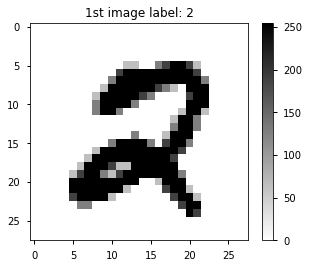

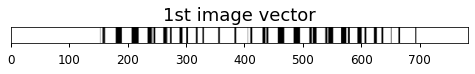

In [4]:
fig1 = plt.figure(figsize=(5, 4))
plt.imshow(train_dataset[0].reshape(-1, 28), cmap='gray_r')
plt.title('1st image label: %s'%(train_target[0]))
plt.colorbar()
fig2 = plt.figure(figsize=(8.2,0.3))
barprops = dict(aspect='auto', cmap='gray_r')
plt.imshow(train_dataset[0].reshape((1, -1)), **barprops)
plt.title('1st image vector', fontsize=18)
plt.xticks(fontsize=12)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

# <a id='2'>2. Principal Component Analysis (PCA)</a>

### 2.1 Vectorize all images by using `numpy.reshape` . The shape of $X$ is now (# of samples) by (784).

In [5]:
# sklearn에서 가져올때부터 flatten되어있었습니다
# 28x28로 되어있었다고 가정을 하여 코드를 작성하였습니다
X = train_dataset.reshape(60000, 28, 28)
print('original shape:', X.shape)

original shape: (60000, 28, 28)


In [6]:
X = train_dataset.reshape(60000, -1)
print('vectorized shape:', X.shape)

vectorized shape: (60000, 784)


### 2.2 Compute the mean $\mu$ of all the images and subtract it from $X$ along the feature dimensions. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Set $X_0$ to the zero-mean data matrix.

In [7]:
X_mean = X.mean(axis=0)
X_0 = X-X_mean
print('Mean subtracted!')

Mean subtracted!


### 2.3 Compute the covariance $\sum$ of $X_0$. You may use `numpy.cov` or code up the covariance.

In [8]:
cov = np.cov(X_0, rowvar=0) 
#cov = np.matmul(X_0.T, X_0) / len(X_0) //second method (without numpy.cov)
print('Covariance matrix computed!')

Covariance matrix computed!


### 2.4 Compute the eigenvalues & eigenvectors of the covariance by using `np.linalg.svd` .

In [9]:
u, s, v = np.linalg.svd(cov)
print('Eigenvalues & Eigenvectors obtained by np.linalg.svd!')

Eigenvalues & Eigenvectors obtained by np.linalg.svd!


# <a id='3'>3. Fraction of variance</a>

>**We'd like to understand the amount of variance captured by the orthogonal directions we found in step 2.<br>📌Fraction of Variance $FoV(k) = \frac{\sum_i^k s_i}{\sum_i^D s_i}$<br>**

### 3.1 Make a plot of fraction of variance as a function of the number of principal components. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;You may use `numpy.cumsum` .

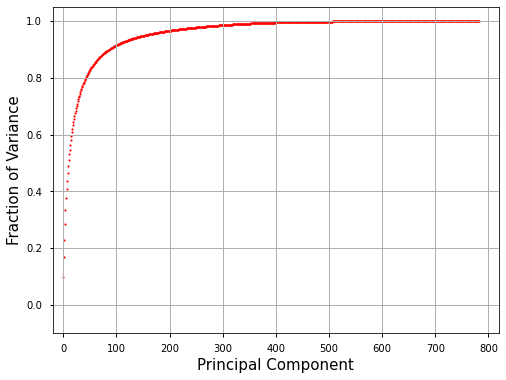

In [10]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(np.arange(784), s.cumsum()/s.sum(), color='r', s=3)
plt.xlabel('Principal Component', fontsize=15)
plt.ylabel('Fraction of Variance', fontsize=15)
plt.axis([-20, 820, -0.1, 1.05])
plt.grid()
plt.show()

### 3.2 How many principal components do we need to capture 80% of the total variance at least? <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Use numpy.where to estimate the number, and print out the number

In [11]:
k = np.where((s.cumsum()/s.sum())>0.8)[0][0]
print('We need at least', k, 'principal components to capture 80% of the total variance.')

We need at least 42 principal components to capture 80% of the total variance.


# <a id='4'>4. Low-dimensional reconstruction</a>

>**Reconstruct a low-dimensional version of the first image (the first row of the images matrix) from the first 100 eigenvectors.<br>The resulting vector should be $\hat{x}_i = \overline{x} + \sum_{k=1}^K (x_i\cdot e_k) e_k$<br>where<br>
$x_i$ is the i-th image sample,<br>
$e_k$ is the eigenvector of k-th largest eigenvalue,<br>
$\overline{x}$ is the mean of entire images,<br>
$\hat{x}_i$ is the reconstructed image from $K$ eigenvectors.**

In [12]:
X_hat = np.zeros((784, 784))
sub = X_mean.copy()
for i in range(784):
    sub += (np.dot(X[0]-X_mean,u[:, i])) * u[:, i]
    X_hat[i] = sub

# <a id='5'>5. Visualize average image</a>

>**Display the first image together with the average image $\mu$.**

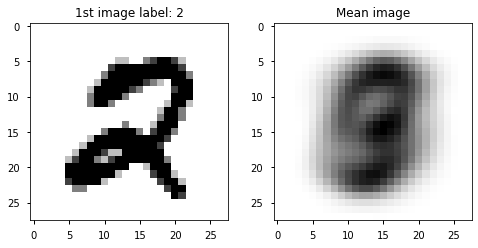

In [13]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.imshow(X[0].reshape(-1, 28), cmap='gray_r')
plt.title('1st image label: %s'%(train_target[0]))
plt.subplot(222)
plt.imshow(X_mean.reshape(-1, 28), cmap='gray_r')
plt.title('Mean image')
plt.show()

# <a id='6'>6. Visualize the reconstruction of image</a>

>**Display the 100 images reconstructed from {e1}, {e1, e2}, $...${e1, e2, $...$, e100}.<br>Use `numpy.reshape` and `imshow(..., cmap='gray_r')` as in step 1.**

Image 1 reconstructed by k number of eigenvectors:


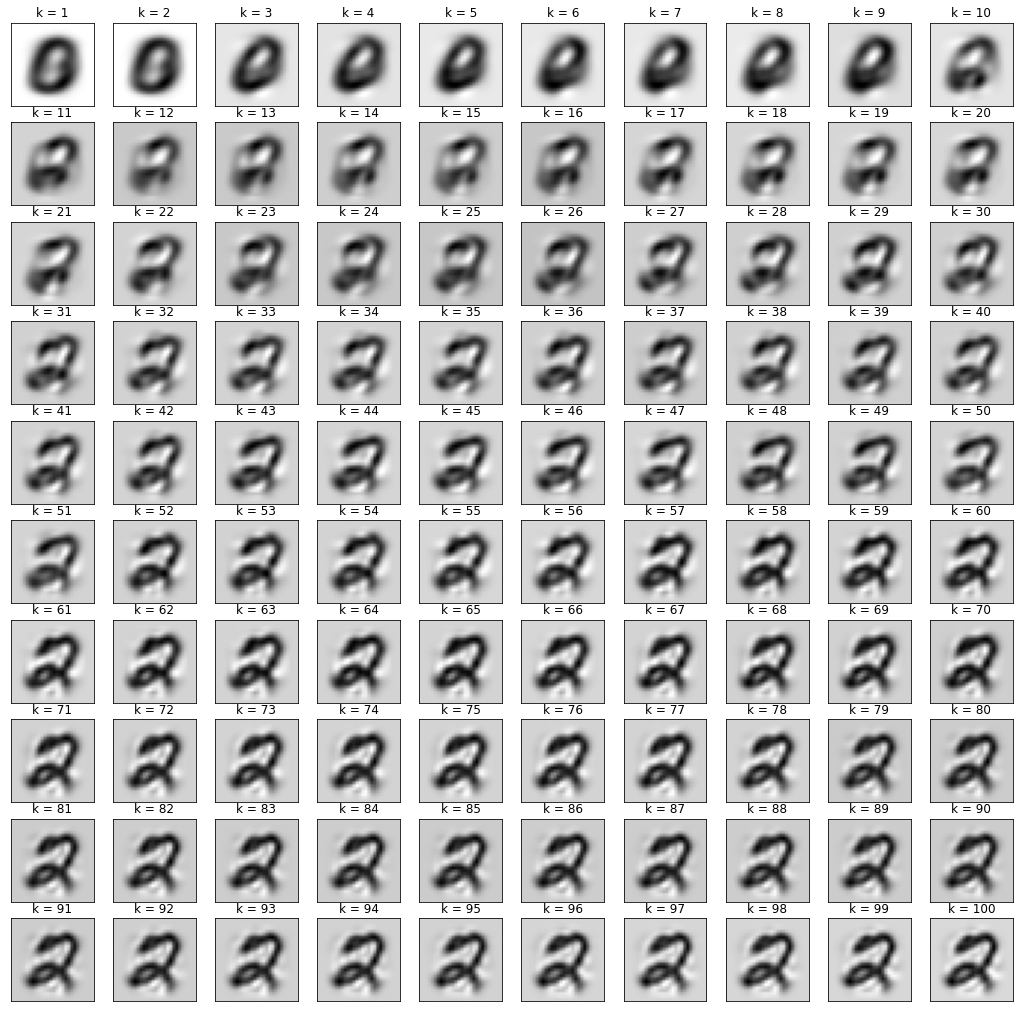

In [14]:
print('Image 1 reconstructed by k number of eigenvectors:')
fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(nrows=10, ncols=10, height_ratios=[1]*10, width_ratios=[1]*10)
for i in range(100):
    plt.subplot(gs[i], title='k = '+str(i+1))
    plt.imshow(X_hat[i].reshape(-1, 28), cmap='gray_r')
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)

<center><a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Move to TOP</a><center>